In [1]:
# import

from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import MinMaxScaler, RobustScaler

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Constants

INITIAL_FILENAME='data/initial/framingham.csv'
PREPARATION_PATH='data/preparation/'
PRESENTATION_PATH='data/presentation/'
PROCESSED_FILENAME=PREPARATION_PATH + 'framingham Processed.csv'

In [3]:
# load

df = pd.read_csv(INITIAL_FILENAME)

df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [4]:
# Checking the percentage of missing values in each column
missing_values = df.isnull().mean() * 100

# Exploratory Data Analysis (EDA)
# Checking the distribution of the target variable
target_distribution = df['TenYearCHD'].value_counts(normalize=True) * 100

missing_values, target_distribution

# Imputing missing values
# For columns with lower missing values, we use mean/mode imputation
simple_imputer = SimpleImputer(strategy='mean')
columns_simple_impute = ['education', 'cigsPerDay', 'BPMeds', 'totChol', 'BMI', 'heartRate']
df[columns_simple_impute] = simple_imputer.fit_transform(df[columns_simple_impute])

# For 'glucose' with a higher percentage of missing values, we use KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
df['glucose'] = knn_imputer.fit_transform(df[['glucose']])

# Check if there are any missing values left
missing_values_after_imputation = df.isnull().sum()

missing_values_after_imputation

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [5]:
df

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.00000,0,0,0,195.0,106.0,70.0,26.97,80.0,77.000000,0
1,0,46,2.0,0,0.0,0.00000,0,0,0,250.0,121.0,81.0,28.73,95.0,76.000000,0
2,1,48,1.0,1,20.0,0.00000,0,0,0,245.0,127.5,80.0,25.34,75.0,70.000000,0
3,0,61,3.0,1,30.0,0.00000,0,1,0,225.0,150.0,95.0,28.58,65.0,103.000000,1
4,0,46,3.0,1,23.0,0.00000,0,0,0,285.0,130.0,84.0,23.10,85.0,85.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.00000,0,1,0,313.0,179.0,92.0,25.97,66.0,86.000000,1
4234,1,51,3.0,1,43.0,0.00000,0,0,0,207.0,126.5,80.0,19.71,65.0,68.000000,0
4235,0,48,2.0,1,20.0,0.02963,0,0,0,248.0,131.0,72.0,22.00,84.0,86.000000,0
4236,0,44,1.0,1,15.0,0.00000,0,0,0,210.0,126.5,87.0,19.16,86.0,81.966753,0


In [6]:
df_copy = df.copy()
y = df_copy['TenYearCHD']
X = df_copy.drop('TenYearCHD', axis=1)
for column in X.columns:
    if X[column].dtype in ['float64', 'int64']:
        median = X[column].median()
        Q1 = X[column].quantile(0.25)
        Q3 = X[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        X[column] = X[column].apply(lambda x: median if x < lower_bound or x > upper_bound else x)

# Feature Selection based on correlation analysis
# Selecting features that are less correlated with each other but more correlated with the target variable


# Normalization/Standardization
# Using RobustScaler as it is less sensitive to outliers
scaler = RobustScaler()
X_scaled = scaler.fit_transform(X)

# Displaying the first few rows of the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df['TenYearCHD'] = y
df = X_scaled_df.copy()
df


,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1.0,-0.714286,1.0,0.0,0.00,0.0,0.0,0.0,0.0,-0.709091,-0.916667,-0.857143,0.332623,0.357143,-0.272727,0
1,0.0,-0.214286,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.290909,-0.291667,-0.071429,0.707889,1.428571,-0.363636,0
2,1.0,-0.071429,-0.5,1.0,1.00,0.0,0.0,0.0,0.0,0.200000,-0.020833,-0.142857,-0.014925,0.000000,-0.909091,0
3,0.0,0.857143,0.5,1.0,1.50,0.0,0.0,1.0,0.0,-0.163636,0.916667,0.928571,0.675906,-0.714286,2.090909,1
4,0.0,-0.214286,0.5,1.0,1.15,0.0,0.0,0.0,0.0,0.927273,0.083333,0.142857,-0.492537,0.714286,0.454545,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1.0,0.071429,-0.5,1.0,0.05,0.0,0.0,1.0,0.0,1.436364,2.125000,0.714286,0.119403,-0.642857,0.545455,1
4234,1.0,0.142857,0.5,1.0,2.15,0.0,0.0,0.0,0.0,-0.490909,-0.062500,-0.142857,-1.215352,-0.714286,-1.090909,0
4235,0.0,-0.071429,0.0,1.0,1.00,0.0,0.0,0.0,0.0,0.254545,0.125000,-0.714286,-0.727079,0.642857,0.545455,0
4236,0.0,-0.357143,-0.5,1.0,0.75,0.0,0.0,0.0,0.0,-0.436364,-0.062500,0.357143,-1.332623,0.785714,0.178796,0


In [7]:
df.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.0,4238.0,4238.000000,4238.0,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.429212,0.041782,-0.010525,0.494101,0.441542,0.0,0.0,0.310524,0.0,0.015926,0.093062,0.016180,0.017398,0.017594,-0.134409,0.151958
std,0.495022,0.612297,0.503538,0.500024,0.578113,0.0,0.0,0.462763,0.0,0.732805,0.770220,0.758805,0.742423,0.779070,0.869812,0.359023
min,0.000000,-1.214286,-0.500000,0.000000,0.000000,0.0,0.0,0.000000,0.0,-2.000000,-1.854167,-2.071429,-2.014925,-2.071429,-2.454545,0.000000
25%,0.000000,-0.500000,-0.500000,0.000000,0.000000,0.0,0.0,0.000000,0.0,-0.509091,-0.458333,-0.500000,-0.496802,-0.500000,-0.727273,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.500000,0.500000,1.000000,1.000000,0.0,0.0,1.000000,0.0,0.490909,0.541667,0.500000,0.503198,0.500000,0.272727,0.000000
max,1.000000,1.500000,1.000000,1.000000,2.500000,0.0,0.0,1.000000,0.0,2.036364,2.354167,2.142857,2.140725,2.142857,2.181818,1.000000


In [8]:
df.drop(columns=['BPMeds', 'prevalentStroke', 'diabetes'], axis=1, inplace=True)

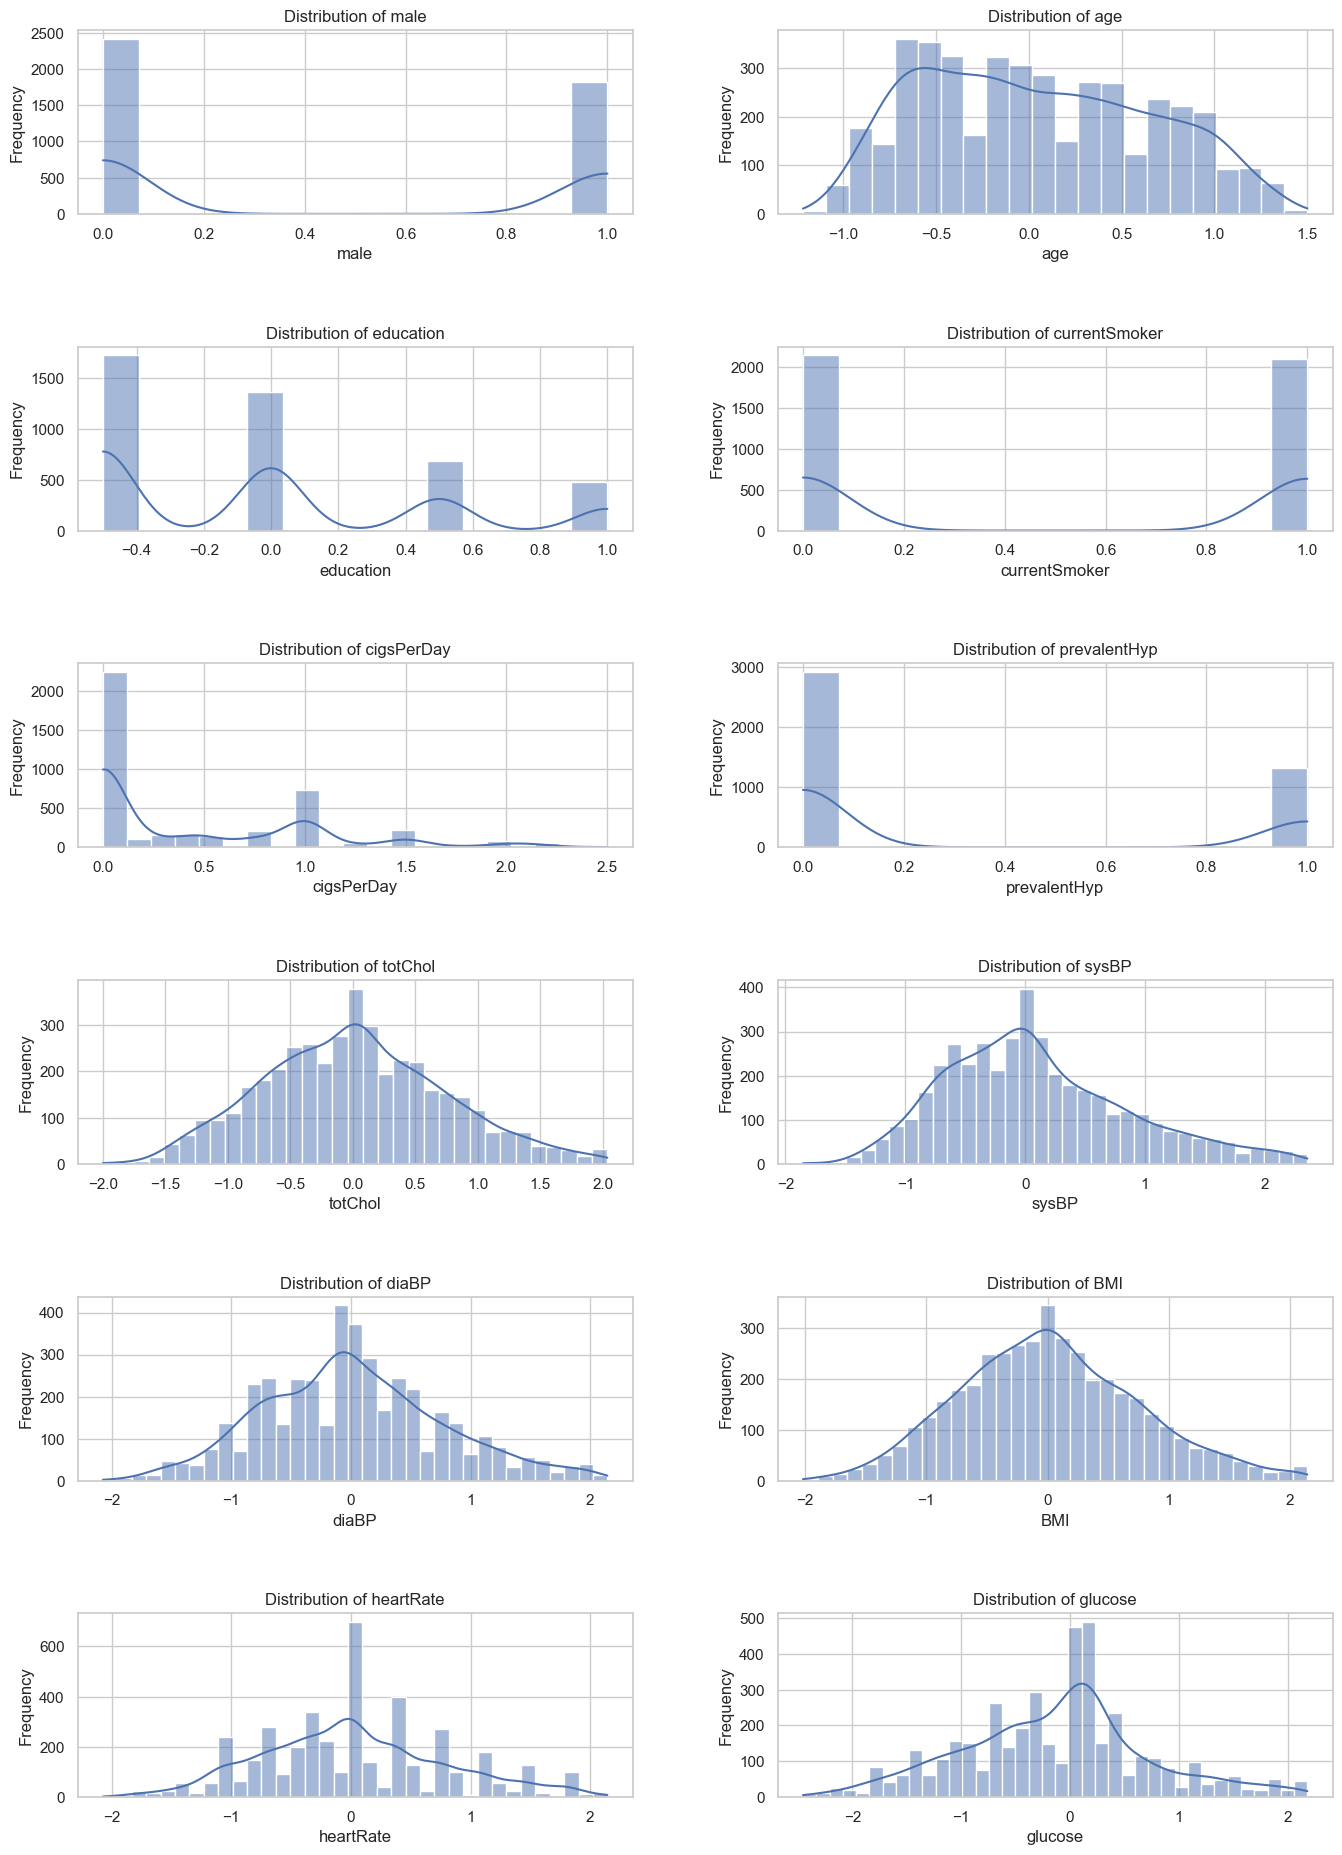

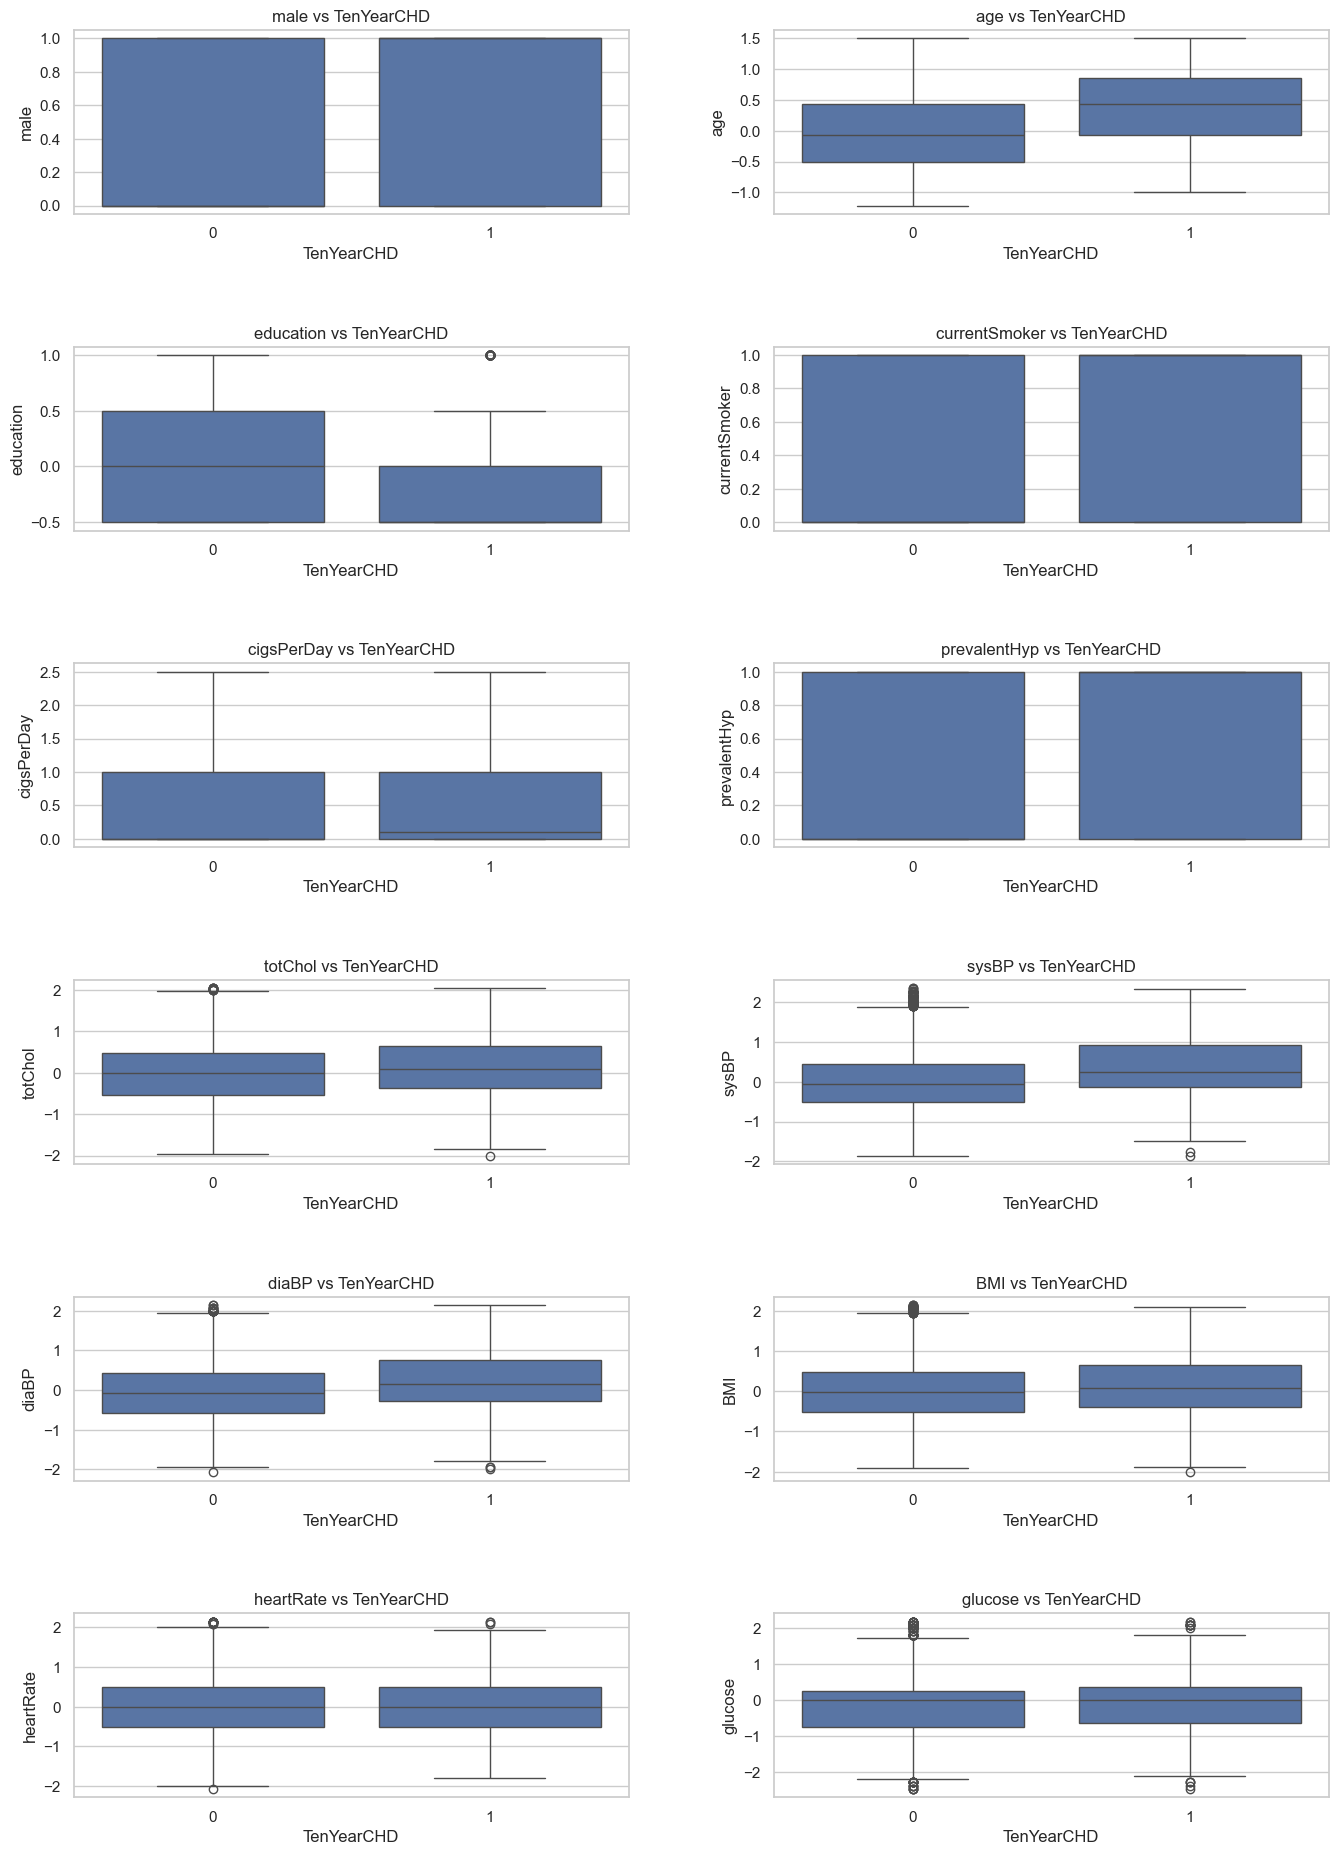

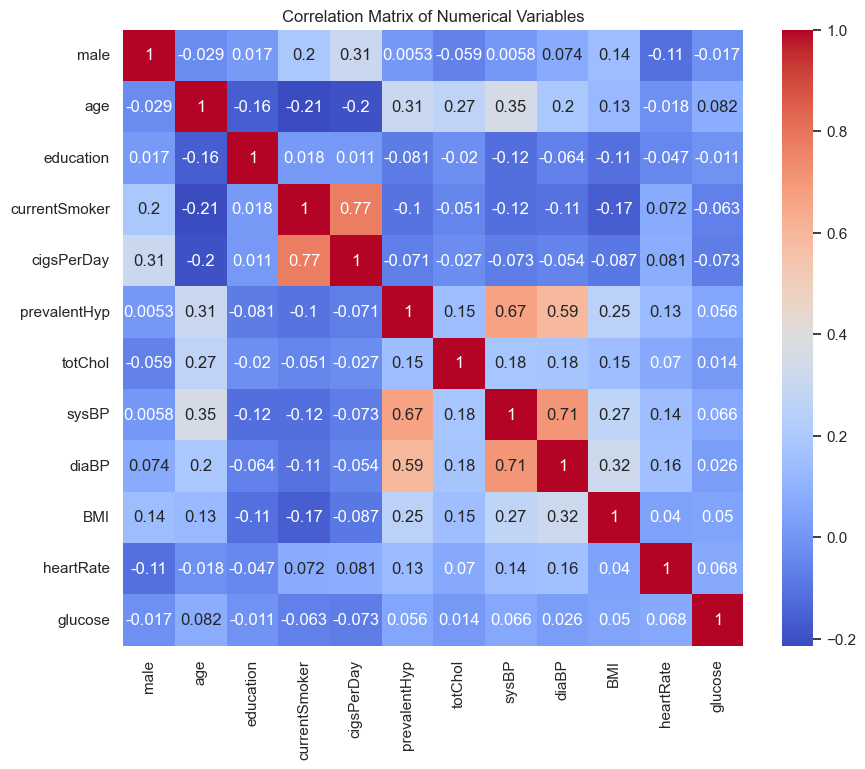

In [9]:
# Setting plot style
sns.set(style="whitegrid")

# List of key numerical variables for EDA
numerical_variables = df.drop('TenYearCHD', axis=1).select_dtypes(['int64', 'float64']).columns

# Creating distributions plots for numerical variables
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=6.0)

for i, var in enumerate(numerical_variables):
    sns.histplot(df[var], ax=axes[i//2, i%2], kde=True)
    axes[i//2, i%2].set_title(f'Distribution of {var}')
    axes[i//2, i%2].set_xlabel(var)
    axes[i//2, i%2].set_ylabel('Frequency')
plt.savefig(PRESENTATION_PATH + 'Distribution of Columns.png')
plt.show()

# Creating boxplots to see the relationship between numerical variables and the target variable
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=6.0)

for i, var in enumerate(numerical_variables):
    sns.boxplot(x='TenYearCHD', y=var, data=df, ax=axes[i//2, i%2])
    axes[i//2, i%2].set_title(f'{var} vs TenYearCHD')
    axes[i//2, i%2].set_xlabel('TenYearCHD')
    axes[i//2, i%2].set_ylabel(var)
plt.savefig(PRESENTATION_PATH + 'Distribution of Columns vs TenYearCHD.png')
plt.show()

# Checking for correlations
corr_matrix = df[numerical_variables].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables')
plt.savefig(PRESENTATION_PATH + 'Correlation Matrix of Numerical Variables.png')
plt.show()



In [10]:
df = df[[
    'age',
    'education',
    'currentSmoker',
    'prevalentHyp',
    'sysBP',
    'BMI',
    'heartRate',
    'TenYearCHD'
]]

In [11]:
df.dtypes

age              float64
education        float64
currentSmoker    float64
prevalentHyp     float64
sysBP            float64
BMI              float64
heartRate        float64
TenYearCHD         int64
dtype: object

In [12]:
y_series = df['TenYearCHD']
df = df.drop('TenYearCHD', axis=1)

In [13]:
df.describe()

,age,education,currentSmoker,prevalentHyp,sysBP,BMI,heartRate
count,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000,4238.000000
mean,0.041782,-0.010525,0.494101,0.310524,0.093062,0.017398,0.017594
std,0.612297,0.503538,0.500024,0.462763,0.770220,0.742423,0.779070
min,-1.214286,-0.500000,0.000000,0.000000,-1.854167,-2.014925,-2.071429
25%,-0.500000,-0.500000,0.000000,0.000000,-0.458333,-0.496802,-0.500000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.500000,1.000000,1.000000,0.541667,0.503198,0.500000
max,1.500000,1.000000,1.000000,1.000000,2.354167,2.140725,2.142857


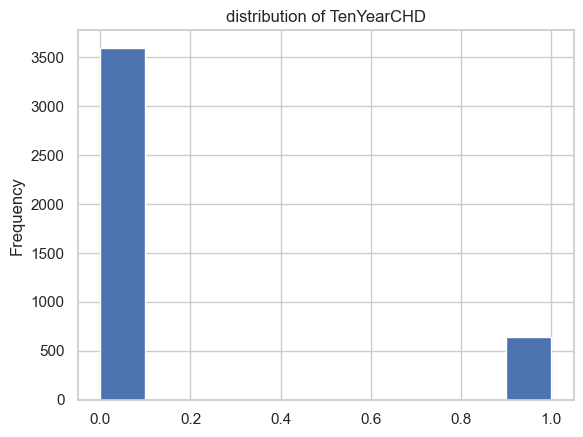

In [14]:
y_series.plot(kind='hist')
plt.title('distribution of TenYearCHD')
plt.savefig(PRESENTATION_PATH + 'distributionTenYearCHD.png')
plt.show()

Given the large distribution bias toward 0, we will experience a model bias. To prevent this, I will need to apply SMOTE

In [15]:
df['TenYearCHD'] = y_series
df.to_csv(PROCESSED_FILENAME, index=False)